In [1]:
import numpy as np
x_test = np.load('/home/jovyan/Edge-IIoT/x_test.npy')
x_train = np.load('/home/jovyan/Edge-IIoT/x_train.npy')
x_val = np.load('/home/jovyan/Edge-IIoT/x_val.npy')
y_test = np.load('/home/jovyan/Edge-IIoT/y_test.npy')
y_train = np.load('/home/jovyan/Edge-IIoT/y_train.npy')
y_val = np.load('/home/jovyan/Edge-IIoT/y_val.npy')

In [2]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score,recall_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def printmatrix(x_test_adv, y_test, classifier, model_name, attack_name, epsilon):
    # preds = np.argmax(classifier.predict(x_test_adv), axis=1)
    preds = classifier.predict(x_test_adv)

    y_hat = preds
    # y_test_arg = np.argmax(y_test, axis=1)
    y_test_arg = y_test
    conf_matrix = confusion_matrix(y_test_arg, y_hat)
    cm = conf_matrix
    fp = cm.sum(axis=0) - np.diag(cm)
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    tnr = tn / (tn + fp)
    accuracy = accuracy_score(y_test_arg, y_hat)
    precision_macro = precision_score(y_test_arg, y_hat, average='macro')
    precision_micro = precision_score(y_test_arg, y_hat, average='micro')
    precision_weighted = precision_score(y_test_arg, y_hat, average='weighted')
    f1_macro = f1_score(y_test_arg, y_hat, average='macro')
    f1_micro = f1_score(y_test_arg, y_hat, average='micro')
    f1_weighted = f1_score(y_test_arg, y_hat, average='weighted')
    recall_macro = recall_score(y_test_arg, y_hat, average='macro')
    recall_micro = recall_score(y_test_arg, y_hat, average='micro')
    recall_weighted = recall_score(y_test_arg, y_hat, average='weighted')

    # auc = roc_auc_score(y_test_arg, y_hat, multi_class='ovr')
    print(f"epsilon = {epsilon}")
    print(f"FPR: {fpr}")
    print(f"TPR: {tpr}")
    print(f"FNR: {fnr}")
    print(f"TNR: {tnr}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision(micro,macro,weighted): {precision_micro},{precision_macro},{precision_weighted}")
    print(f"F1(micro,macro,weighted: {f1_micro},{f1_macro},{f1_weighted}")
    print(f"Recall(micro,macro,weighted: {recall_micro},{recall_macro},{recall_weighted}")

    # print(f"AUC: {auc}")
    
    print(f"FPR: {np.mean(fpr)}")
    print(f"tpr: {np.mean(tpr)}")
    print(f"fnr: {np.mean(fnr)}")
    print(f"tnr: {np.mean(tnr)}")
    
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    disp.plot()
    plt.show()
    
    metrics = {
        "model" : model_name,
        "attack_model" : attack_name,
        "epsilon" : epsilon,
        "Accuracy": accuracy,
        "Precision-micro": precision_micro,
        "Precision-macro": precision_macro,
        "Precision-weighted": precision_weighted,
        "F1-micro": f1_micro,
        "F1-macro": f1_macro,
        "F1-weighted": f1_weighted,
        "Recall_micro": recall_micro,
        "Recall_macro": recall_macro,
        "Recall_weighted": recall_weighted,
        "FPR": np.mean(fpr),
        "TPR": np.mean(tpr),
        "FNR": np.mean(fnr),
        "TNR": np.mean(tnr),
        # "AUC": auc
    }
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv("/home/jovyan/Edge-IIoT/attackmodel.csv", mode='a', index=False)

In [3]:
import joblib
import tensorflow as tf
from art.estimators.classification import TensorFlowV2Classifier

model = joblib.load("/home/jovyan/Edge-IIoT/pre_train/RF.joblib")

# Wrap the model
classifier = TensorFlowV2Classifier(model=model, nb_classes=4,
    input_shape=(52,),
    loss_object=tf.keras.losses.SparseCategoricalCrossentropy(),)

2024-04-09 20:24:27.190799: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:24:27.193748: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-09 20:24:27.226435: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-09 20:24:27.997744: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


epsilon = 0.01
FPR: [0.00901126 0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.98142415 1.        ]
FNR: [0.32748538 0.         0.01857585 0.        ]
TNR: [0.99098874 1.         0.97486535 1.        ]
Accuracy: 0.9779164666346616
Precision(micro,macro,weighted): 0.9779164666346616,0.9332471977758086,0.9769092175556591
F1(micro,macro,weighted: 0.9779164666346616,0.9226679378116749,0.977287325197611
Recall(micro,macro,weighted: 0.9779164666346616,0.9134846921224631,0.9779164666346616
FPR: 0.008536478497583381
tpr: 0.9134846921224631
fnr: 0.08651530787753697
tnr: 0.9914635215024166


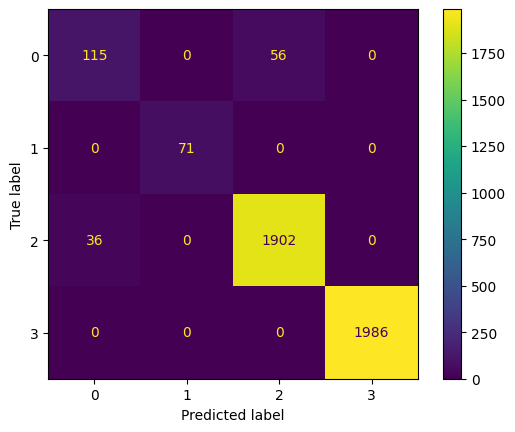

epsilon = 0.1
FPR: [0.01226533 0.         0.03186715 0.        ]
TPR: [0.58479532 1.         0.9747162  1.        ]
FNR: [0.41520468 0.         0.0252838  0.        ]
TNR: [0.98773467 1.         0.96813285 1.        ]
Accuracy: 0.971195391262602
Precision(micro,macro,weighted): 0.971195391262602,0.9087291124503493,0.9696500334725519
F1(micro,macro,weighted: 0.971195391262602,0.8985537455105181,0.9702865182903353
Recall(micro,macro,weighted: 0.971195391262602,0.8898778809769522,0.971195391262602
FPR: 0.011033119271620945
tpr: 0.8898778809769522
fnr: 0.1101221190230478
tnr: 0.988966880728379


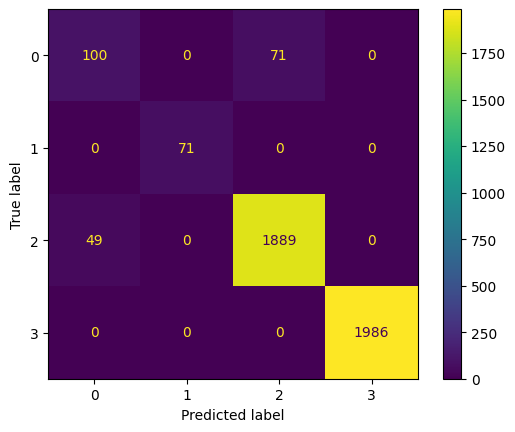

epsilon = 0.2
FPR: [0.03329161 0.         0.07540395 0.00183486]
TPR: [0.01754386 0.94366197 0.93137255 1.        ]
FNR: [0.98245614 0.05633803 0.06862745 0.        ]
TNR: [0.96670839 1.         0.92459605 0.99816514]
Accuracy: 0.9267882861257801
Precision(micro,macro,weighted): 0.9267882861257801,0.7337248136946022,0.9192895660518544
F1(micro,macro,weighted: 0.9267882861257801,0.7281475041931882,0.9229795734137667
Recall(micro,macro,weighted: 0.9267882861257801,0.7231445951249291,0.9267882861257801
FPR: 0.02763260665854224
tpr: 0.7231445951249291
fnr: 0.2768554048750708
tnr: 0.9723673933414578


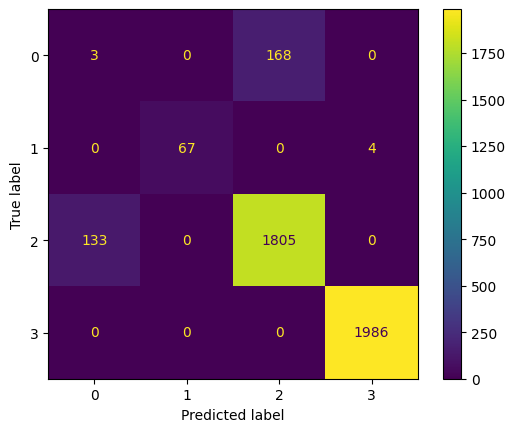

epsilon = 0.3
FPR: [0.03354193 0.         0.03680431 0.00183486]
TPR: [0.52046784 0.94366197 0.93085655 1.        ]
FNR: [0.47953216 0.05633803 0.06914345 0.        ]
TNR: [0.96645807 1.         0.96319569 0.99816514]
Accuracy: 0.9471915506481037
Precision(micro,macro,weighted): 0.9471915506481037,0.8384037069731579,0.9541511779661757
F1(micro,macro,weighted: 0.9471915506481037,0.8413249376584941,0.9502470544689579
Recall(micro,macro,weighted: 0.9471915506481037,0.8487465903089677,0.9471915506481037
FPR: 0.018045274647927538
tpr: 0.8487465903089677
fnr: 0.15125340969103235
tnr: 0.9819547253520725


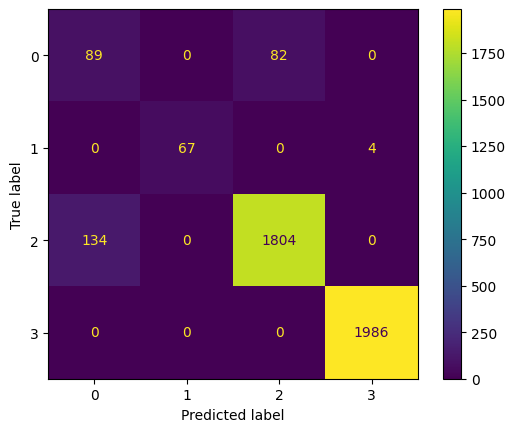

In [4]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_FGSM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "RF", "FGSM", epsilon)

epsilon = 0.01
FPR: [0.00500626 0.         0.02378815 0.        ]
TPR: [0.69005848 1.         0.98968008 1.        ]
FNR: [0.30994152 0.         0.01031992 0.        ]
TNR: [0.99499374 1.         0.97621185 1.        ]
Accuracy: 0.9824771963514163
Precision(micro,macro,weighted): 0.9824771963514163,0.9570456400414709,0.9815421886997651
F1(micro,macro,weighted: 0.9824771963514163,0.9362697981009719,0.9816154769132217
Recall(micro,macro,weighted: 0.9824771963514163,0.9199346405228759,0.9824771963514163
FPR: 0.007198602157544327
tpr: 0.9199346405228759
fnr: 0.08006535947712418
tnr: 0.9928013978424557


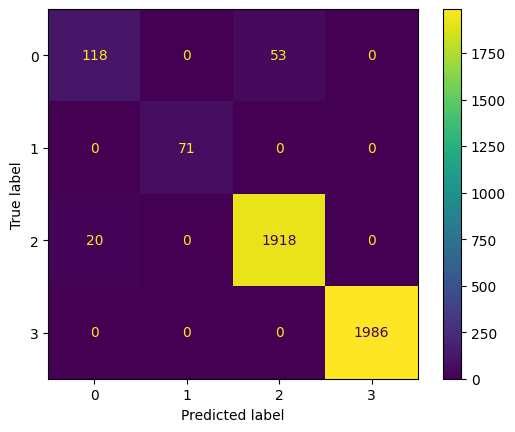

epsilon = 0.1
FPR: [0.01076345 0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.97781218 1.        ]
FNR: [0.32748538 0.         0.02218782 0.        ]
TNR: [0.98923655 1.         0.97486535 1.        ]
Accuracy: 0.9762361977916466
Precision(micro,macro,weighted): 0.9762361977916466,0.9247862180381369,0.9754765163934056
F1(micro,macro,weighted: 0.9762361977916466,0.918407932591418,0.9758064185427939
Recall(micro,macro,weighted: 0.9762361977916466,0.9125816993464052,0.9762361977916466
FPR: 0.008974526057032691
tpr: 0.9125816993464052
fnr: 0.08741830065359477
tnr: 0.9910254739429674


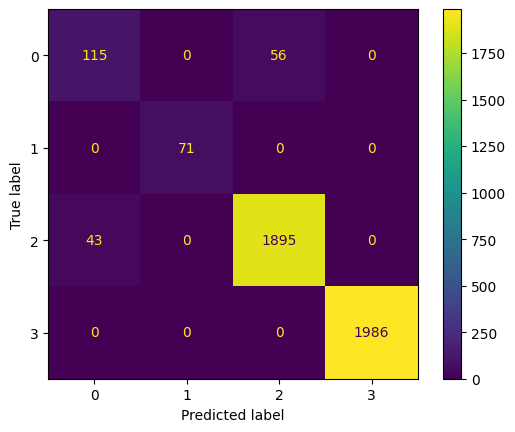

epsilon = 0.2
FPR: [0.03254068 0.         0.03904847 0.        ]
TPR: [0.49122807 1.         0.93292054 1.        ]
FNR: [0.50877193 0.         0.06707946 0.        ]
TNR: [0.96745932 1.         0.96095153 1.        ]
Accuracy: 0.9479116658665386
Precision(micro,macro,weighted): 0.9479116658665386,0.8366532685621286,0.953707957956527
F1(micro,macro,weighted: 0.9479116658665387,0.844937504447027,0.9505283218960173
Recall(micro,macro,weighted: 0.9479116658665386,0.8560371517027864,0.9479116658665386
FPR: 0.01789728745312251
tpr: 0.8560371517027864
fnr: 0.14396284829721362
tnr: 0.9821027125468775


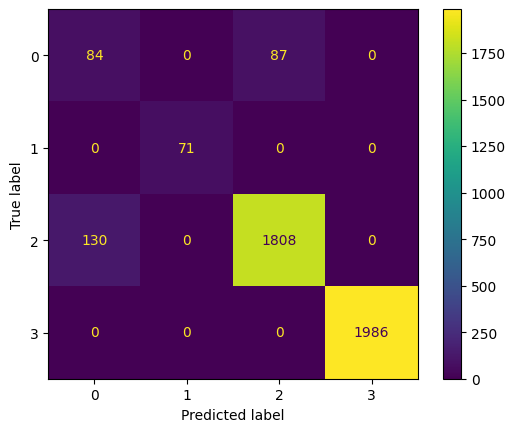

epsilon = 0.3
FPR: [0.02853567 0.         0.03321364 0.        ]
TPR: [0.56725146 1.         0.94117647 1.        ]
FNR: [0.43274854 0.         0.05882353 0.        ]
TNR: [0.97146433 1.         0.96678636 1.        ]
Accuracy: 0.9548727796447432
Precision(micro,macro,weighted): 0.9548727796447432,0.855181807739751,0.9596859908913888
F1(micro,macro,weighted: 0.9548727796447432,0.8647110045913883,0.957000178646581
Recall(micro,macro,weighted: 0.9548727796447432,0.8771069831441349,0.9548727796447432
FPR: 0.015437328527805178
tpr: 0.8771069831441349
fnr: 0.12289301685586515
tnr: 0.9845626714721948


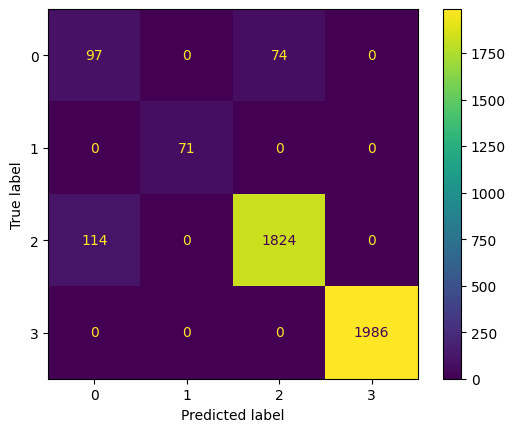

In [5]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_BIM_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "RF", "BIM", epsilon)

epsilon = 0.01
FPR: [0.03153942 0.         0.90933573 0.85412844]
TPR: [0.0877193  0.         0.07069143 0.        ]
FNR: [0.9122807  1.         0.92930857 1.        ]
TNR: [0.96846058 1.         0.09066427 0.14587156]
Accuracy: 0.03648583773403745
Precision(micro,macro,weighted): 0.03648583773403745,0.04243023381631107,0.03383112077287281
F1(micro,macro,weighted: 0.03648583773403745,0.04074170464989778,0.035027808039405035
Recall(micro,macro,weighted: 0.03648583773403745,0.039602683178534576,0.03648583773403745
FPR: 0.4487508979392095
tpr: 0.039602683178534576
fnr: 0.9603973168214655
tnr: 0.5512491020607905


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


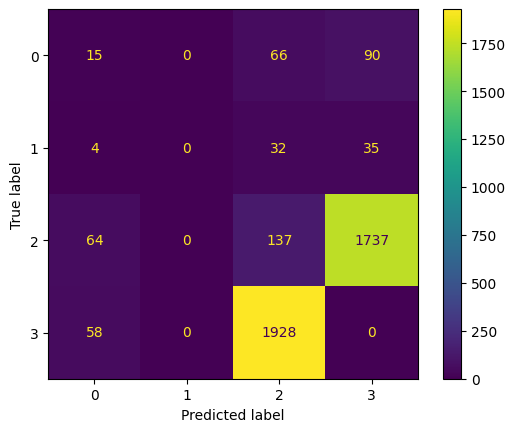

epsilon = 0.1
FPR: [0.03229036 0.         0.90978456 0.85366972]
TPR: [0.08187135 0.         0.06965944 0.        ]
FNR: [0.91812865 1.         0.93034056 1.        ]
TNR: [0.96770964 1.         0.09021544 0.14633028]
Accuracy: 0.0357657225156025
Precision(micro,macro,weighted): 0.0357657225156025,0.040086070266458794,0.03306630093916985
F1(micro,macro,weighted: 0.0357657225156025,0.038756408264719586,0.034294958686321306
Recall(micro,macro,weighted: 0.0357657225156025,0.03788269693842449,0.0357657225156025
FPR: 0.4489361619669902
tpr: 0.03788269693842449
fnr: 0.9621173030615755
tnr: 0.5510638380330097


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


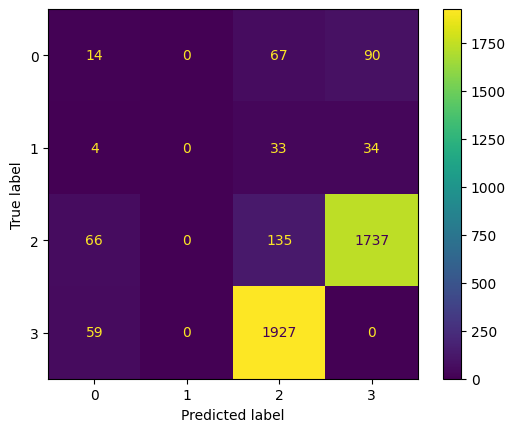

epsilon = 0.2
FPR: [0.03854819 0.         0.90709156 0.85366972]
TPR: [0.11695906 0.         0.05675955 0.        ]
FNR: [0.88304094 1.         0.94324045 1.        ]
TNR: [0.96145181 1.         0.09290844 0.14633028]
Accuracy: 0.031204992798847815
Precision(micro,macro,weighted): 0.031204992798847815,0.04164037174280058,0.02873084816954586
F1(micro,macro,weighted: 0.031204992798847815,0.04250234184947339,0.029910847047461945
Recall(micro,macro,weighted: 0.031204992798847815,0.043429652562779496,0.031204992798847815
FPR: 0.4498273679852851
tpr: 0.043429652562779496
fnr: 0.9565703474372205
tnr: 0.5501726320147149


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


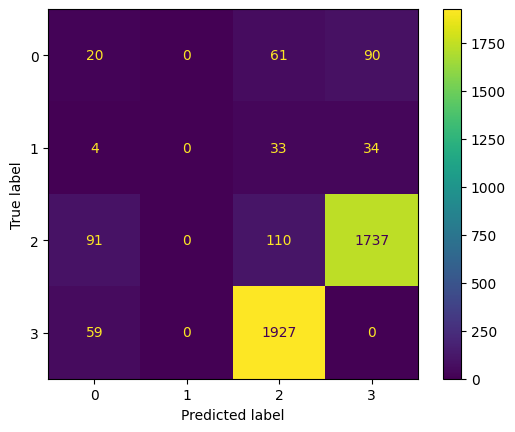

epsilon = 0.3
FPR: [0.04155194 0.         0.9061939  0.85412844]
TPR: [0.14035088 0.         0.04901961 0.        ]
FNR: [0.85964912 1.         0.95098039 1.        ]
TNR: [0.95844806 1.         0.0938061  0.14587156]
Accuracy: 0.028564570331253
Precision(micro,macro,weighted): 0.028564570331253,0.04281357366927252,0.02608997193571785
F1(micro,macro,weighted: 0.028564570331253005,0.044963603350351246,0.027270879680957816
Recall(micro,macro,weighted: 0.028564570331253,0.047342621259029924,0.028564570331253
FPR: 0.4504685690406537
tpr: 0.047342621259029924
fnr: 0.95265737874097
tnr: 0.5495314309593463


/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jovyan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


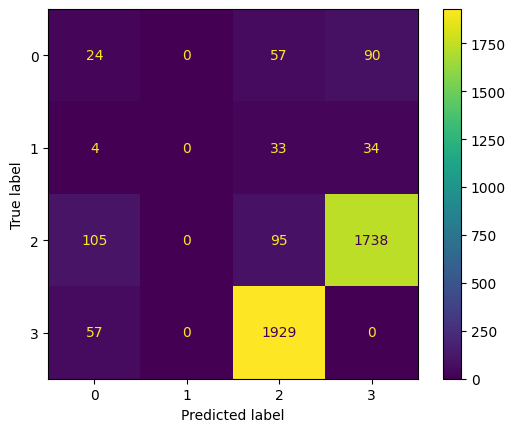

In [6]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_DF_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "RF", "DF", epsilon)

epsilon = 0.01
FPR: [0.0077597  0.         0.02513465 0.        ]
TPR: [0.67251462 1.         0.98400413 1.        ]
FNR: [0.32748538 0.         0.01599587 0.        ]
TNR: [0.9922403  1.         0.97486535 1.        ]
Accuracy: 0.9791166586653864
Precision(micro,macro,weighted): 0.9791166586653864,0.9397858673124028,0.9780136761672096
F1(micro,macro,weighted: 0.9791166586653864,0.925812519155082,0.9783600996889283
Recall(micro,macro,weighted: 0.9791166586653864,0.9141296869625043,0.9791166586653864
FPR: 0.008223587383691014
tpr: 0.9141296869625043
fnr: 0.08587031303749569
tnr: 0.9917764126163089


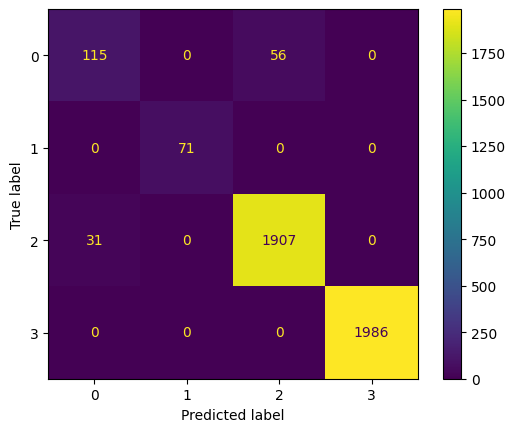

epsilon = 0.1
FPR: [0.01301627 0.         0.02558348 0.        ]
TPR: [0.66666667 1.         0.97316821 1.        ]
FNR: [0.33333333 0.         0.02683179 0.        ]
TNR: [0.98698373 1.         0.97441652 1.        ]
Accuracy: 0.9738358137301968
Precision(micro,macro,weighted): 0.9738358137301968,0.9143527274305663,0.9734950588888398
F1(micro,macro,weighted: 0.9738358137301968,0.9121180796347113,0.9736585714165051
Recall(micro,macro,weighted: 0.9738358137301968,0.9099587203302373,0.9738358137301968
FPR: 0.009649938320566777
tpr: 0.9099587203302373
fnr: 0.09004127966976264
tnr: 0.9903500616794332


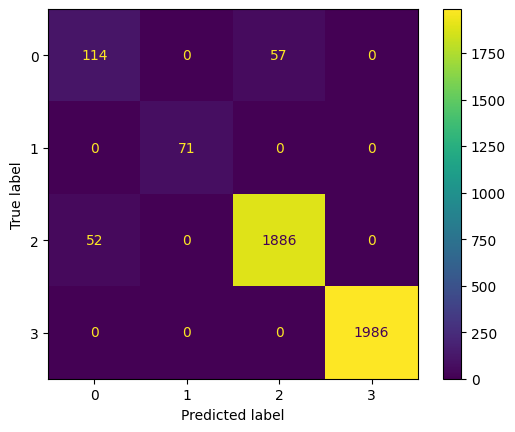

epsilon = 0.2
FPR: [0.03654568 0.         0.05655296 0.        ]
TPR: [0.26315789 1.         0.9246646  1.        ]
FNR: [0.73684211 0.         0.0753354  0.        ]
TNR: [0.96345432 1.         0.94344704 1.        ]
Accuracy: 0.9347095535285646
Precision(micro,macro,weighted): 0.9347095535285646,0.7924771658959758,0.9380638716999626
F1(micro,macro,weighted: 0.9347095535285646,0.7945198413608124,0.9363438353249699
Recall(micro,macro,weighted: 0.9347095535285646,0.7969556243550051,0.9347095535285646
FPR: 0.023274661100163355
tpr: 0.7969556243550051
fnr: 0.20304437564499483
tnr: 0.9767253388998366


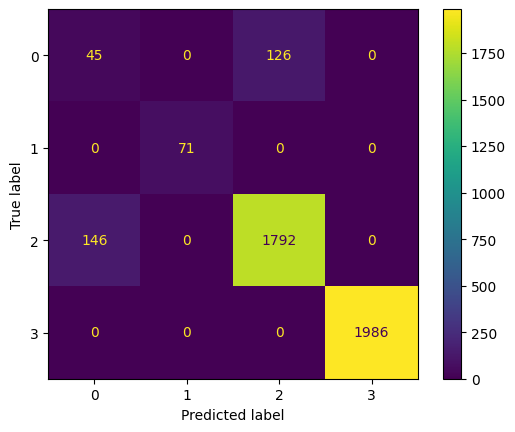

epsilon = 0.3
FPR: [0.02828536 0.         0.04712747 0.        ]
TPR: [0.38596491 1.         0.94169247 1.        ]
FNR: [0.61403509 0.         0.05830753 0.        ]
TNR: [0.97171464 1.         0.95287253 1.        ]
Accuracy: 0.9476716274603937
Precision(micro,macro,weighted): 0.9476716274603937,0.8285777346802906,0.9487794157870829
F1(micro,macro,weighted: 0.9476716274603937,0.8301957453094992,0.9482155518645726
Recall(micro,macro,weighted: 0.9476716274603937,0.8319143446852425,0.9476716274603937
FPR: 0.018853206319389363
tpr: 0.8319143446852425
fnr: 0.1680856553147575
tnr: 0.9811467936806106


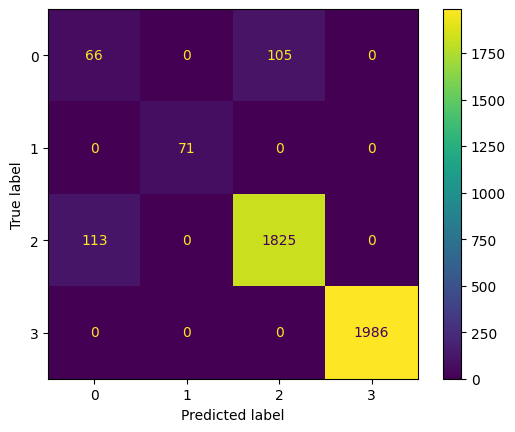

In [7]:
epsilon_values = [0.01, 0.1, 0.2 , 0.3]
for epsilon in epsilon_values:
    filename = f'/home/jovyan/Edge-IIoT/transfer_attackmodel/x_test_adv_PGD_eps_{epsilon}.npy'
    x_test_adv = np.load(filename)
    printmatrix(x_test_adv, y_test, model, "RF", "PDG", epsilon)